<a href="https://colab.research.google.com/github/LunaOh/MachineLearning/blob/main/HCV_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split 
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/기계학습/hcvdat0.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [5]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [6]:
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [8]:
Category_enc = {'0=Blood Donor':0, '0s=suspect Blood Donor':1, '1=Hepatitis':2,
       '2=Fibrosis':3, '3=Cirrhosis':4}
df['Category'] = df['Category'].map(Category_enc)

In [9]:
df['Category'].unique()

array([0, 1, 2, 3, 4])

In [10]:
df['Sex'].unique()

array(['m', 'f'], dtype=object)

In [11]:
df['Sex'] = df['Sex'].apply(lambda x:1 if x=='f' else 0)

In [12]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [13]:
df.isnull().any().any()

True

In [14]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [15]:
df.shape

(615, 13)

In [16]:
df = df.dropna()
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [17]:
df.shape

(589, 13)

In [18]:
len(df[df.duplicated()])

0

In [19]:
y = df['Category']
x = df.drop('Category', axis=1)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=2023)

In [21]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=2023)

# 오버샘플링 수행
x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

# 오버샘플링 이후의 클래스 분포 확인
print("오버샘플링 이전의 클래스 분포: ", y_train.value_counts())
print("오버샘플링 이후의 클래스 분포: ", y_train_resampled.value_counts())

오버샘플링 이전의 클래스 분포:  0    163
4      6
2      4
3      2
1      1
Name: Category, dtype: int64
오버샘플링 이후의 클래스 분포:  0    163
4    163
2    163
3    163
1    163
Name: Category, dtype: int64


In [22]:
dt_clf = DecisionTreeClassifier(random_state=2023)
dt_clf.fit(x_train_resampled, y_train_resampled) # 학습

DecisionTreeClassifier(random_state=2023)

In [23]:
feature_names = x.columns
class_names = df['Category'].unique()

In [24]:
# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names = ['0','1','2','3','4'], feature_names = feature_names, impurity=True, filled=True)

[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]


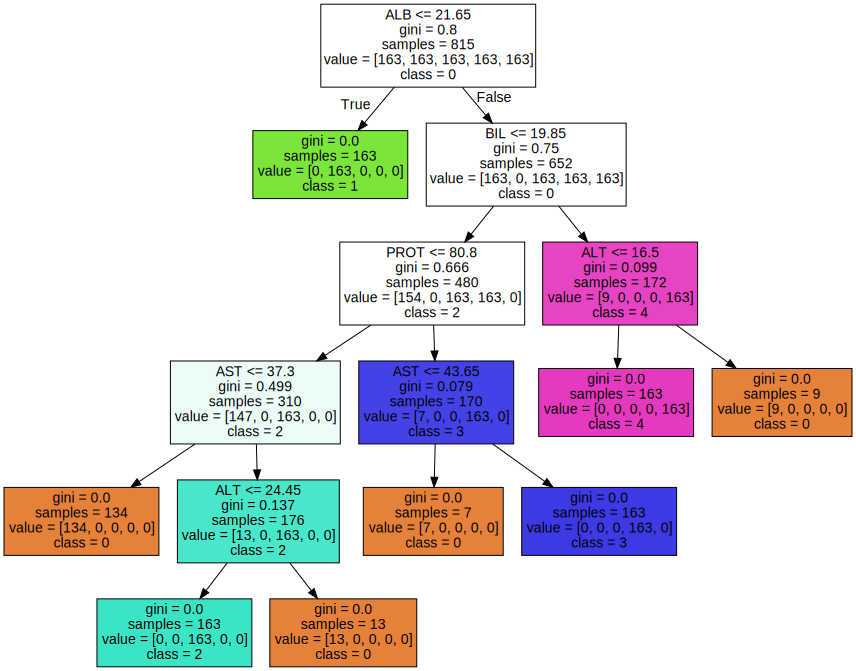

In [25]:
print('[ max_depth의 제약이 없는 경우의 Decision Tree 시각화 ]')
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [26]:
y_pred = dt_clf.predict(x_test) 

In [27]:
# 학습결과 평가
print("Train_Accuracy : ", dt_clf.score(x_train_resampled, y_train_resampled), '\n')
print("Test_Accuracy : ", dt_clf.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average='weighted')
precision = mt.precision_score(y_test, y_pred, average='weighted')
f1 = mt.f1_score(y_test, y_pred, average='weighted')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  1.0 

Test_Accuracy :  0.9128329297820823 

Accuracy:  0.91 

Recall:  0.91 

Precision:  0.88 

F1_score:  0.90 

Confusion Matrix: 
 [[360   0   1   0   2]
 [  3   3   0   0   0]
 [ 10   0   4   1   1]
 [  4   0   6   0   0]
 [  7   0   1   0  10]]


In [28]:
# 교차검증

# 각 폴드의 스코어 
scores = cross_val_score(dt_clf, x, y, cv = 5)

print('Averaged results of cross validation: ', scores.mean())

Averaged results of cross validation:  0.9269882659713169


In [29]:
pd.DataFrame(cross_validate(dt_clf, x, y, cv =5))

,fit_time,score_time,test_score
0,0.011541,0.003701,0.940678
1,0.007360,0.003297,0.915254
2,0.006241,0.002536,0.932203
3,0.007099,0.004938,0.923729
4,0.007549,0.003259,0.923077


In [30]:
# test set에 대한 스코어(정확도)
dt_clf.score(x_test, y_test)

0.9128329297820823